# Week 8 - Linear Disciminant Analysis and Optimization

* FDA (2 classes)
    * Compute the class means (in PCA space)
    * Compute the within-class scatter matrix $\mathbf{S}_W$ and between-class scatter matrix $\mathbf{S}_B$
    * Compute the projection vector $\mathbf{w}$
    * Compute and plot the 1D projection of the data
    * Compute the class separation of the projected values
* LDA (3 classes)
    * Compute the within-class scatter matrix $\mathbf{S}_W$ and between-class scatter matrix $\mathbf{S}_B$
    * Compute the projection matrix $\mathbf{W}$
    * Compute and plot the 2D projection of the data
    * Compute the 2D LDA projection of the original 64D data 
* Constrained Optimization
    * Reformulate the problem as a maximization problem
    * Write out the Lagrangian function
    * Compute the gradients with respects to $x_1, x_2$, Lagrange multiplier $\lambda$ and the KKT multiplier $\mu$
    * Compute the optimum

In [3]:
# Dependencies
import numpy as np
import scipy
from sklearn.datasets import load_digits, make_swiss_roll
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set(); sns.set_palette('bright')

## Data
As usual, we'll be working with a dataset of handwritten digits. 
Let visualise some examples.

In [4]:
# We're using a subset of two classes for now
digits = load_digits(n_class=2)

In [ ]:
# Handy plotting functions

def plot_examples():
    show_num = 4
    _, axes = plt.subplots(1, show_num)
    images_and_labels = list(zip(digits.images, digits.target))
    for ax, (image, label) in zip(axes[:], images_and_labels[:show_num]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Label: %i' % label)

def plot_scatter(data, target, alpha=0.5, legend=True,w=None):
    scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap='rainbow')
    if legend:
        plt.legend(*scatter.legend_elements(), loc="upper right", title="Targets")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

    if w is not None:
        # Define the range of x values based on the scatter plot data
        x_values = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)
        
        # Calculate corresponding y values based on the line equation: w0 + w1*x1 + w2*x2 = 0 => x2 = -(w0 + w1*x1) / w2
        y_values = w[1] * x_values + w[0]

        # Plot the line
        plt.plot(x_values, y_values, color='red', label='Decision boundary')
    #plt.show()
    
def plot_scatter3d(data, targets, view_point=(25, 45), alpha=0.5, legend=True):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:,0], data[:,1], data[:,2], c=targets, cmap="rainbow", alpha=alpha)
    if legend:
        plt.legend(*scatter.legend_elements(), loc="upper right", title="Targets")
    ax.view_init(*view_point) # <- change viewpoint here
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    plt.show()

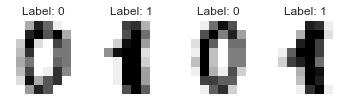

In [6]:
plot_examples()

In [7]:
# We can get a 2D version of the data using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data) # this is the representation, we'll be working with
t = digits.target

In [ ]:
# Let's plot all the data in 2D
plot_scatter(X, t)

## 1) Fisher Discriminant Analysis (FDA)


### 1.1) Compute the class means (in PCA space)

### 1.2) Compute the within-class scatter matrix $\mathbf{S}_W$ and between-class scatter matrix $\mathbf{S}_B$
Use eq (4.27) and (4.28) from textbook for computing $\mathbf{S}_B$ and $\mathbf{S}_W$ respectively

### 1.3) Compute the projection vector $\mathbf{w}$
Hint: Use eq. (4.30) from textbook. You can use `np.linalg.pinv` and `np.linalg.eig` for computing the pseudo-inverse and eigenvectors, respectively. Also, remember to ensure that $||w||_2 = 1$

### 1.4) Compute and plot the 1D projection of the data
Hint: You can use `seaborn.displot` for a nice visualisation

### 1.5) Compute the class separation of the projected values

## 2) Linear Discriminant Analysis (LDA)

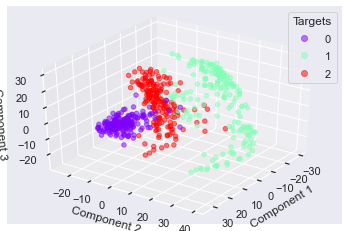

In [18]:
# Data
n_class = 3
digits = load_digits(n_class=n_class)
pca = PCA(n_components=3)
X = pca.fit_transform(digits.data)
t = digits.target

plot_scatter3d(X, t, view_point=(35,35))

### 2.1) Compute the within-class scatter matrix $\mathbf{S}_W$ and between-class scatter matrix $\mathbf{S}_B$
See section 4.1.6 in the textbook or Lecture 15 (slide 17)

### 2.2) Compute the projection matrix $\mathbf{W}$
choose D'=2 (see lecture 15 slide 17 to understand D')

### 2.3) Compute and plot the 2D projection of the data

### 2.4) Compute and plot the 2D LDA projection of the original 64D data 

In [9]:
# Data
n_class = 3
digits = load_digits(n_class=n_class)
X = digits.data
t = digits.target

In [ ]:
# Compute means

# compute within class and between-class scatter matrices

# Compute eigenvalues and eigenvectors, sort them and select top 2 eigenvectors

# perform projection

# plot projection in 2D


Comment on the general utility of the projection as compared to PCA

# 3) Constrained Optimization
 
Consider the problem

minimize $f_{min}(x_1, x_2)$

subject to $ x_1 + x_2 \leq 4 
\quad \text{ and } \quad x_1 + 4x_2 = 5 
$
where $f_{min}(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 2)^2$

## 3.1) Reformulate the problem as a canonical maximization problem
_Use the form described in the end of "Pattern Recognition and Machine Learning" Appendix E._

_NB: There is an error in appendix E: $h(x) \leq 0$, not $h(x) \geq 0$._

## 3.2) Write out the Lagrangian function
_Use Equation (E.12) in "Pattern Recognition and Machine Learning" Appendix E., and write out all variables_

## 3.3) Compute the gradients with respects to $x_1, x_2$, lagrange multiplier $\lambda$ and the KKT multiplier $\mu$

## 3.4) Compute the optimum
_Hint: Set it up as a system of linear equations and solve it using Gaussian Elimination (e.g. using `scipy.linalg.solve`)_

In [ ]:
# Your code here